# Tear Data Example on Predictive Factors

In [1]:
%pylab inline --no-import-all
import yfinance as yf
import alphalens
import pandas as pd
import numpy as np
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tickers = "GOOGL AAPL FB TSLA NFLX PYPL UBER AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T \
BAC JPM GS C MS HSBC BNPQY BCS LYG UBS CS WFC RY SCHW TD HDB USB PNC TFC BNS"
pan = yf.download(tickers, start="2011-05-17", end="2021-05-17")
# tech = data[["Open"]]

[*********************100%***********************]  40 of 40 completed


In [4]:
lookahead_bias_days = 5

predictive_factor = pan['Open']
predictive_factor = predictive_factor.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])

In [5]:
predictive_factor.head()

date        asset
2011-05-16  AAPL    -0.027211
            ADBE    -0.011671
            AMZN    -0.024833
            BAC     -0.035324
            BCS     -0.015315
dtype: float64

In [6]:
pricing = pan['Open'].iloc[1:]
pricing.head()

AAPL       ADBE        AMZN    BAC        BCS      BNPQY  \
Date                                                                        
2011-05-17  11.857143  34.389999  191.820007  11.81  16.331797  37.400002   
2011-05-18  12.016786  34.599998  194.130005  11.90  16.211983  37.900002   
2011-05-19  12.217143  34.980000  198.330002  11.88  16.728111  38.759998   
2011-05-20  12.127143  35.459999  197.949997  11.64  16.617512  37.660000   
2011-05-23  11.784643  34.720001  195.559998  11.47  16.000000  36.060001   

                  BNS          C         CS       CSCO  ...         TD    TFC  \
Date                                                    ...                     
2011-05-17  59.000000  41.000000  40.224609  16.500000  ...  42.105000  26.59   
2011-05-18  59.689999  41.490002  40.361328  16.639999  ...  42.889999  27.07   
2011-05-19  60.320000  41.340000  40.263672  16.750000  ...  43.185001  27.15   
2011-05-20  60.060001  41.119999  40.937500  16.680000  ...  43.105000  27.26   
2011-05-23  59.650002  40.310001  39.804688  16.410000  ...  42.834999  26.24   

             TSLA  UBER        UBS        USB          V         VZ  \
Date                                                                  
2011-05-17  5.400   NaN  18.309999  24.990000  19.950001  36.900002   
2011-05-18  5.220   NaN  18.330000  25.559999  20.107500  37.169998   
2011-05-19  5.406   NaN  18.490000  25.840000  20.032499  37.189999   
2011-05-20  5.652   NaN  18.650000  25.780001  19.834999  37.250000   
2011-05-23  5.524   NaN  18.000000  24.940001  19.272499  36.750000   

                  WFC       XLNX  
Date                              
2011-05-17  27.780001  35.230000  
2011-05-18  28.719999  35.340000  
2011-05-19  29.010000  36.299999  
2011-05-20  28.469999  36.009998  
2011-05-23  27.590000  35.340000  

[5 rows x 40 columns]

In [7]:
sector_names = {
    0 : "information_technology",
    1 : "financials",
#     2 : "health_care",
#     3 : "industrials",
#     4 : "utilities", 
#     5 : "real_estate", 
#     6 : "materials", 
#     7 : "telecommunication_services", 
#     8 : "consumer_staples", 
#     9 : "consumer_discretionary", 
#     10 : "energy" 
}

ticker_sector = {
    "GOOGL" : 0, "AAPL" : 0, "FB" : 0, "TSLA" : 0, "NFLX" : 0, "PYPL" : 0, "UBER" : 0, "AMZN" : 0, "INTC" : 0, "NVDA" : 0, 
    "ADBE" : 0, "CSCO" : 0, "V" : 0, "IBM" : 0, "QCOM" : 0, "MSFT" : 0, "XLNX" : 0, "HPQ" : 0, "VZ" : 0, "T" : 0,
    "BAC" : 1, "JPM" : 1, "GS" : 1, "C" : 1, "MS" : 1, "HSBC" : 1, "BNPQY" : 1, "BCS" : 1, "LYG" : 1, "UBS" : 1, 
    "CS" : 1, "WFC" : 1, "RY" : 1, "SCHW" : 1, "TD" : 1, "HDB" : 1, "USB" : 1, "PNC" : 1, "TFC" : 1, "BNS" : 1
}

In [8]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=ticker_sector,
                                                                   groupby_labels=sector_names)

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [9]:
factor_data.head()

1D        5D       10D    factor  \
date       asset                                           
2011-05-17 AAPL   0.013464  0.010542  0.050813  0.010542   
           ADBE   0.006106  0.004943  0.004071  0.004943   
           AMZN   0.012043  0.027004  0.022104  0.027004   
           BAC    0.007621 -0.030483 -0.008467 -0.030483   
           BCS   -0.007336 -0.027088  0.010722 -0.027088   

                                   group  factor_quantile  
date       asset                                           
2011-05-17 AAPL   information_technology                5  
           ADBE   information_technology                4  
           AMZN   information_technology                5  
           BAC                financials                1  
           BCS                financials                1

# Return Analysis

In [10]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [11]:
mean_return_by_q_daily.head()

1D        5D       10D
factor_quantile date                                    
1               2011-05-17 -0.009616 -0.031769 -0.023426
                2011-05-18 -0.006932 -0.026301 -0.034602
                2011-05-19 -0.008075 -0.025045 -0.028508
                2011-05-20 -0.001845 -0.028382 -0.040743
                2011-05-23 -0.001128 -0.038347 -0.034820

In [12]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=False)

In [13]:
mean_return_by_q.head()

1D        5D       10D
factor_quantile                              
1               -0.008220 -0.039716 -0.038996
2               -0.002854 -0.013687 -0.013732
3               -0.000073 -0.000812 -0.001411
4                0.002650  0.012246  0.012142
5                0.008483  0.041883  0.041883

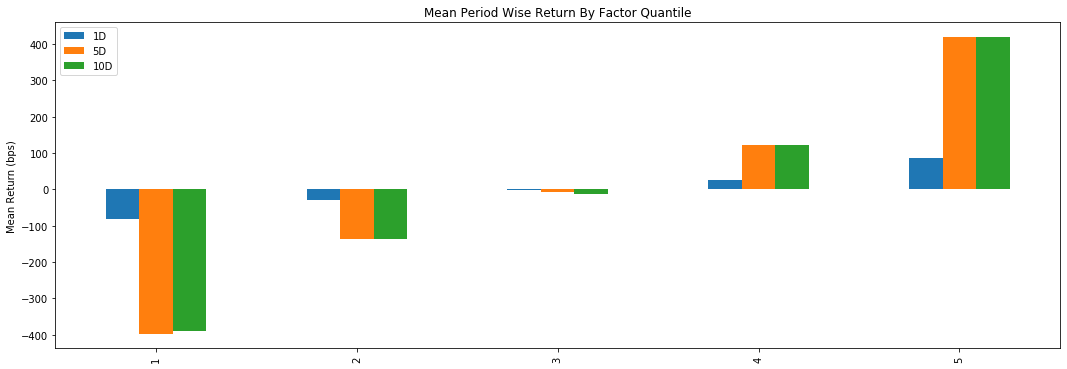

In [14]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

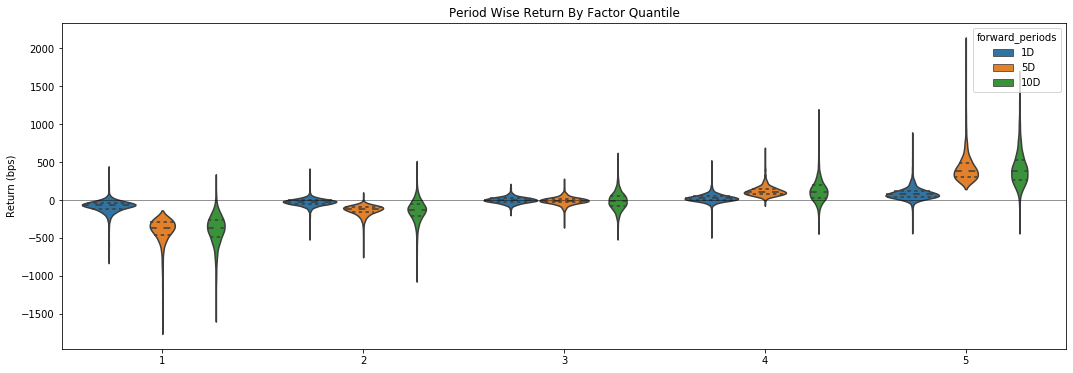

In [15]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

In [16]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                        upper_quant=5,
                                                                                        lower_quant=1,
                                                                                        std_err=std_err)

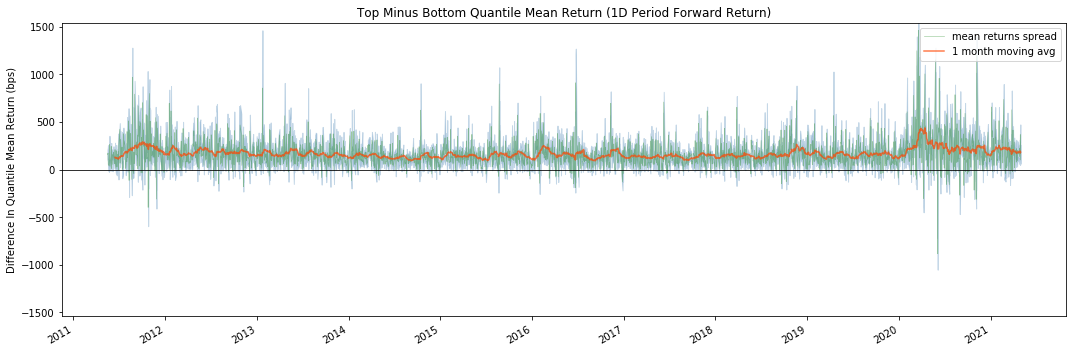

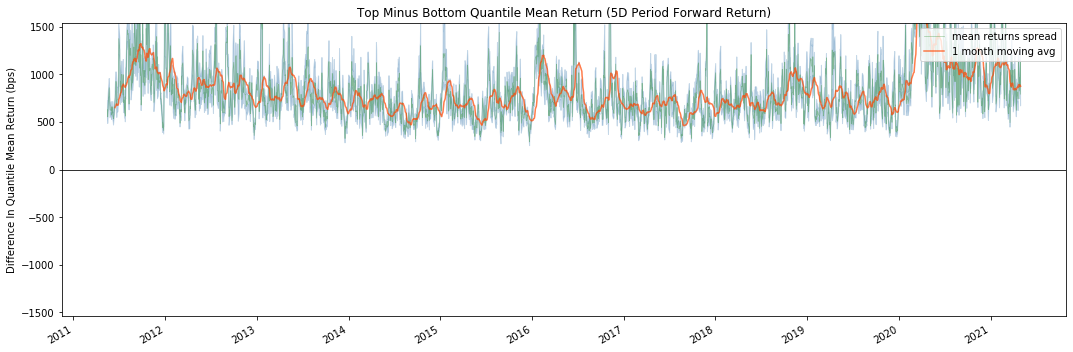

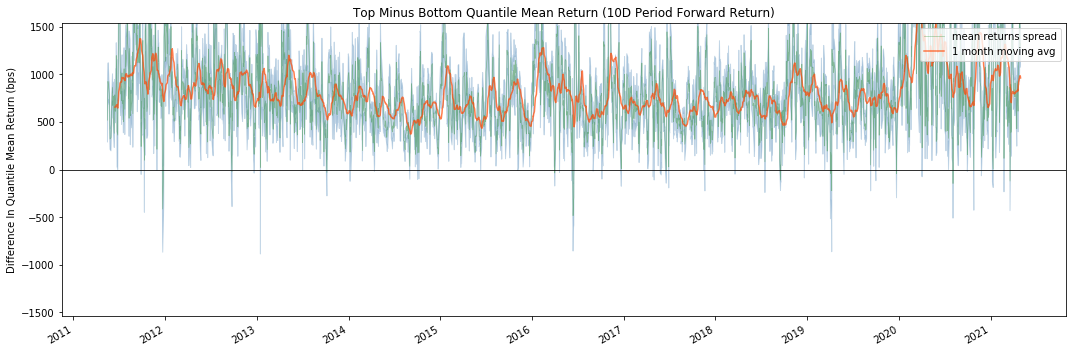

In [17]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

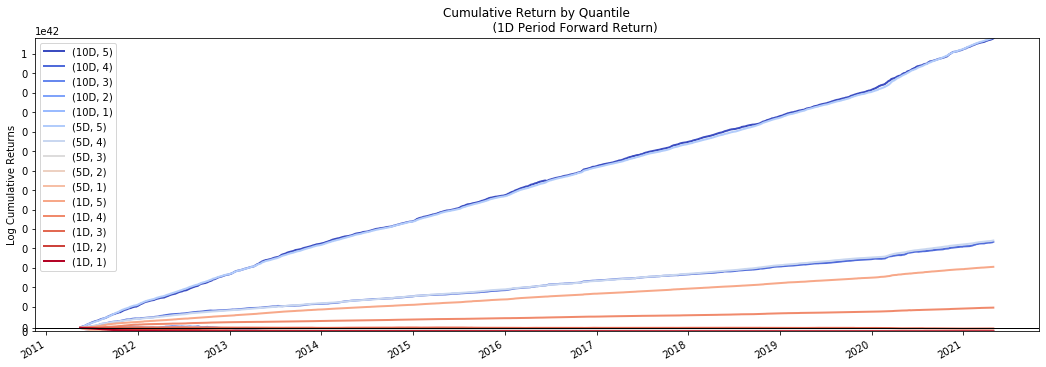

In [18]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily, period='1D')

In [19]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [20]:
ls_factor_returns.head()

1D        5D       10D
date                                    
2011-05-17  0.006775  0.034209  0.033311
2011-05-18  0.008237  0.026969  0.042886
2011-05-19  0.010742  0.039753  0.060562
2011-05-20  0.005645  0.038302  0.050650
2011-05-23  0.002294  0.040443  0.038094

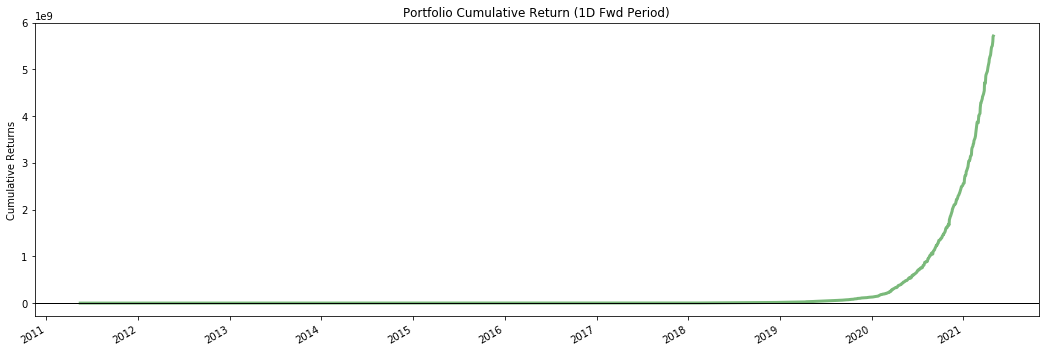

In [21]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['1D'], period='1D')

In [22]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [23]:
alpha_beta

1D        5D       10D
Ann. alpha  8.618899  7.958973  1.972401
beta        0.052141  0.083772  0.068959

# Returns Tear Sheet

Returns Analysis


1D       5D     10D
Ann. alpha                                       8.619    7.959   1.972
beta                                             0.052    0.084   0.069
Mean Period Wise Return Top Quantile (bps)      84.834   82.396  41.114
Mean Period Wise Return Bottom Quantile (bps)  -82.197  -80.724 -39.697
Mean Period Wise Spread (bps)                  167.031  163.128  80.804

<Figure size 432x288 with 0 Axes>

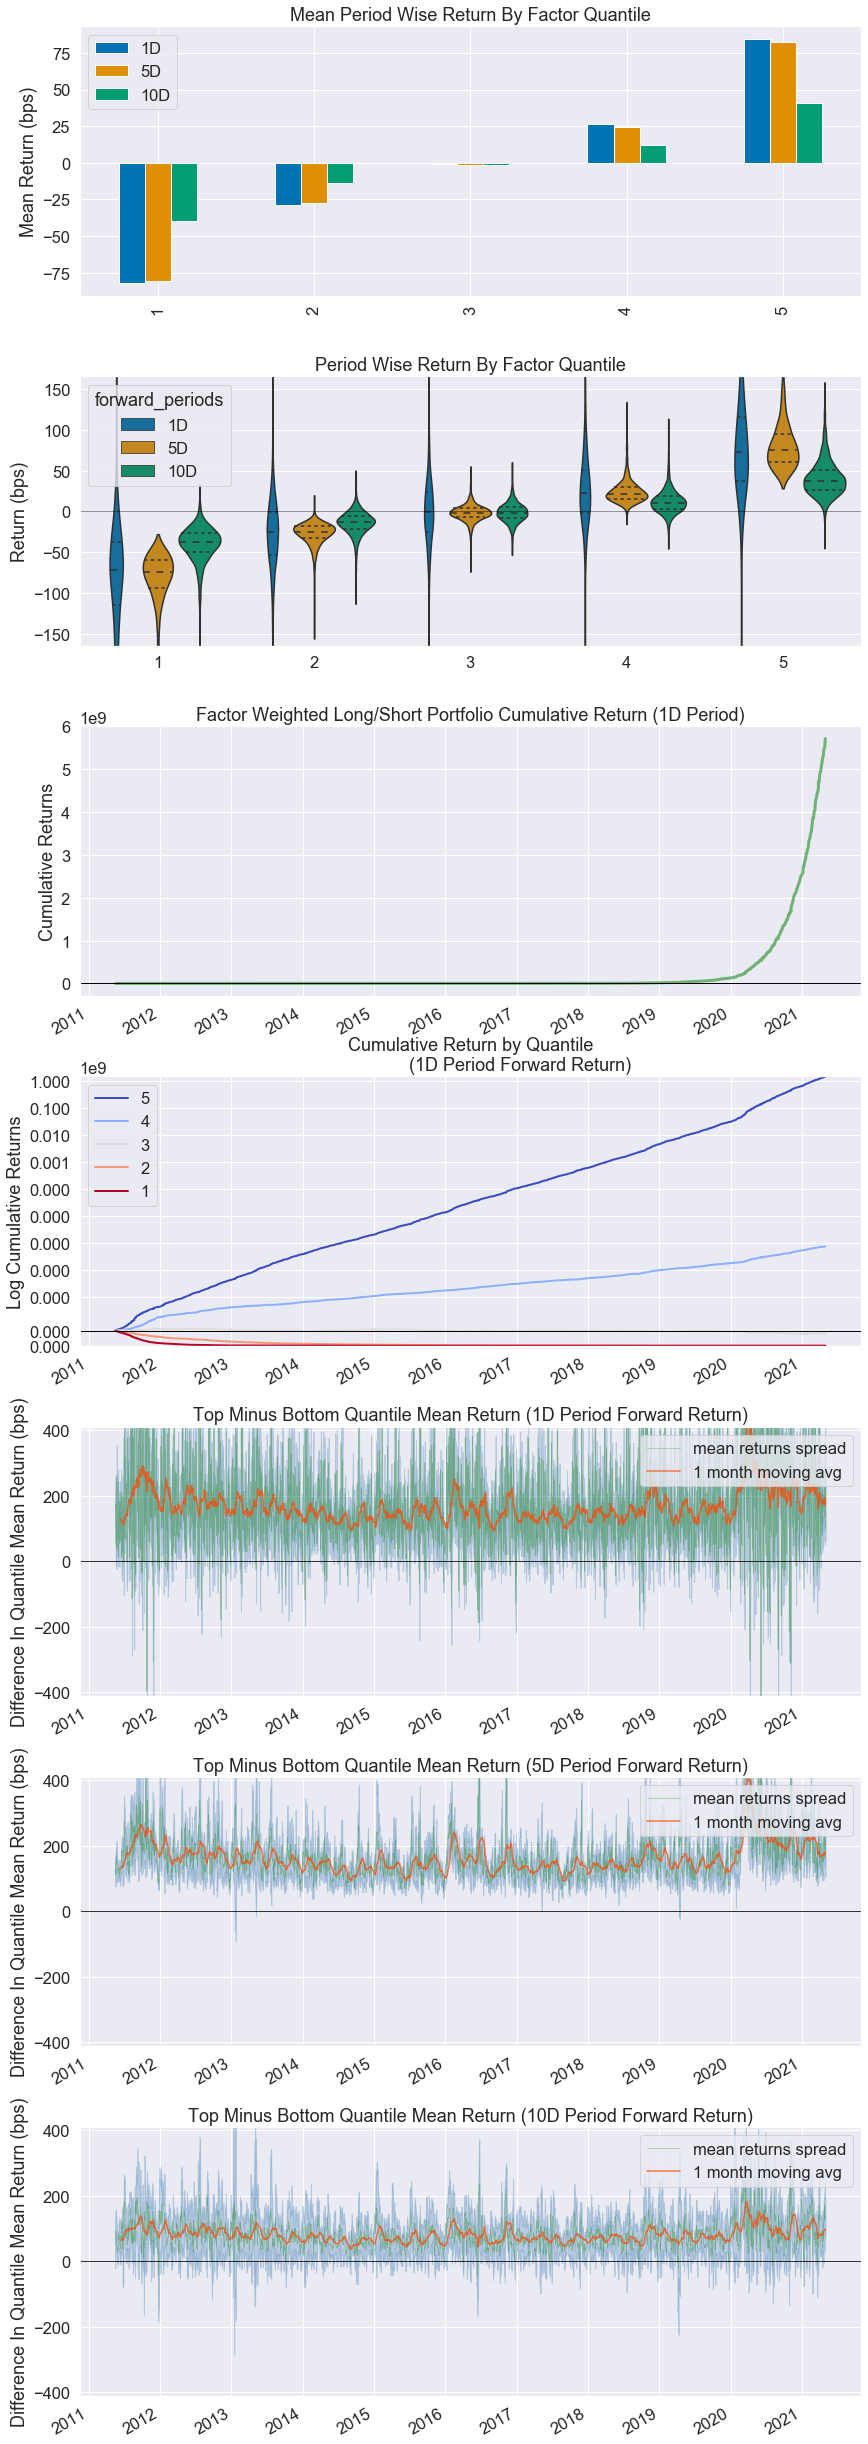

In [24]:
alphalens.tears.create_returns_tear_sheet(factor_data)

# Information Analysis

In [25]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [26]:
ic.head()

1D   5D       10D
date                               
2011-05-17  0.385728  1.0  0.375059
2011-05-18  0.534139  1.0  0.673779
2011-05-19  0.355856  1.0  0.673779
2011-05-20  0.105263  1.0  0.753201
2011-05-23 -0.050972  1.0  0.701043

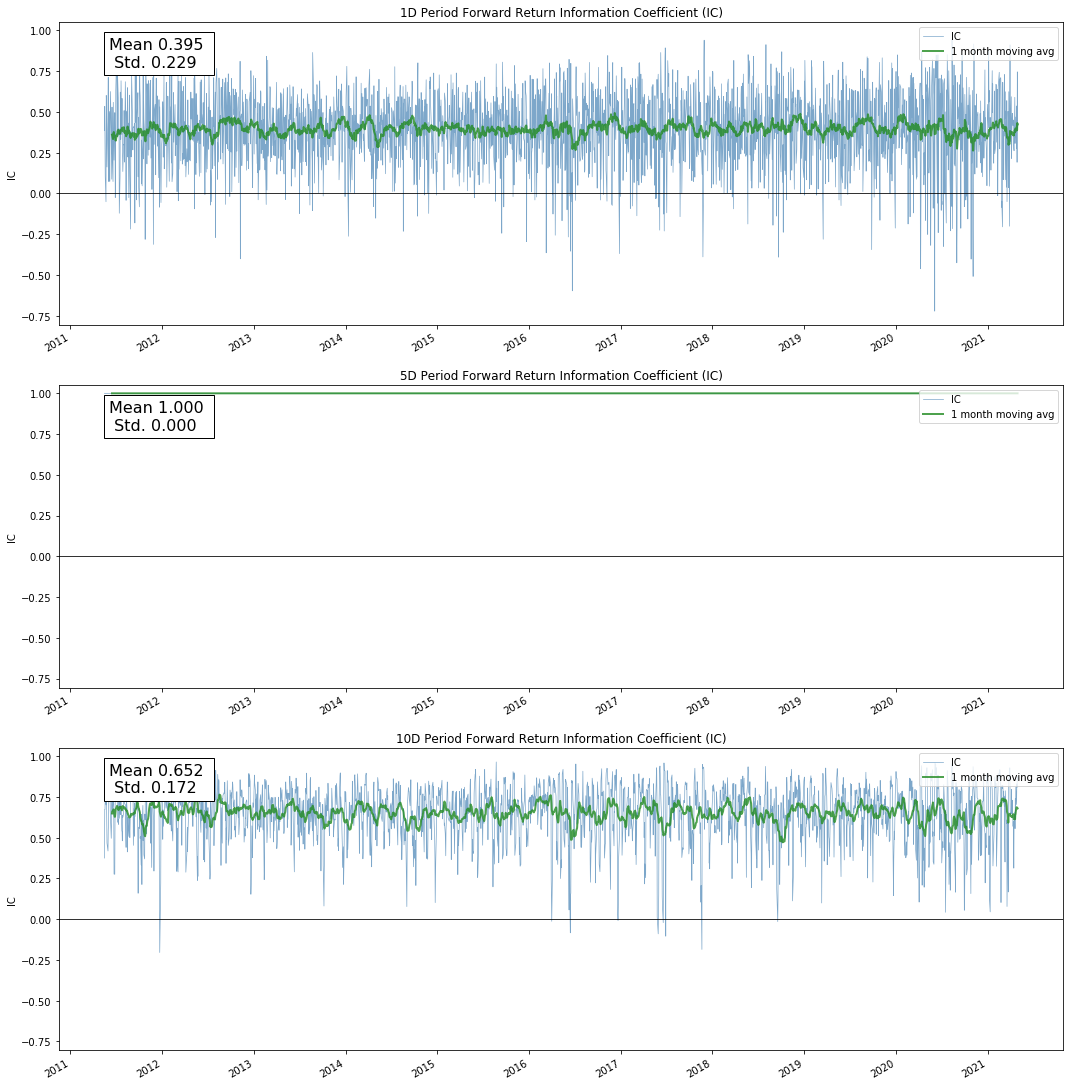

In [27]:
alphalens.plotting.plot_ic_ts(ic);

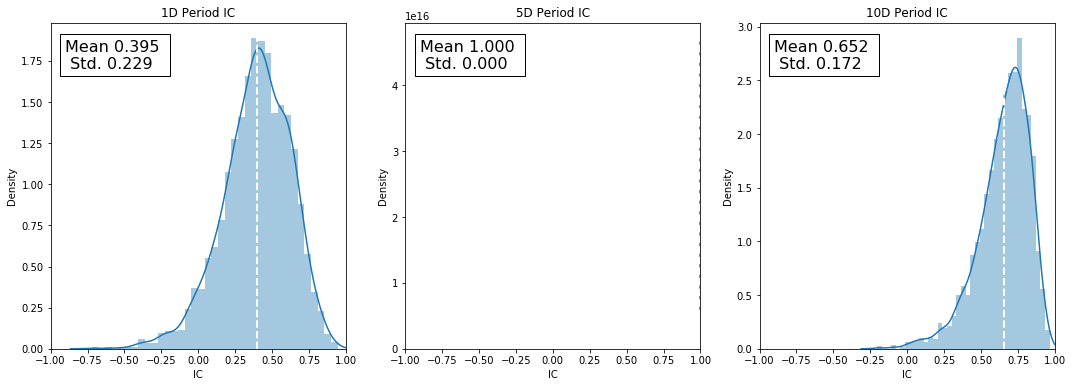

In [28]:
alphalens.plotting.plot_ic_hist(ic);

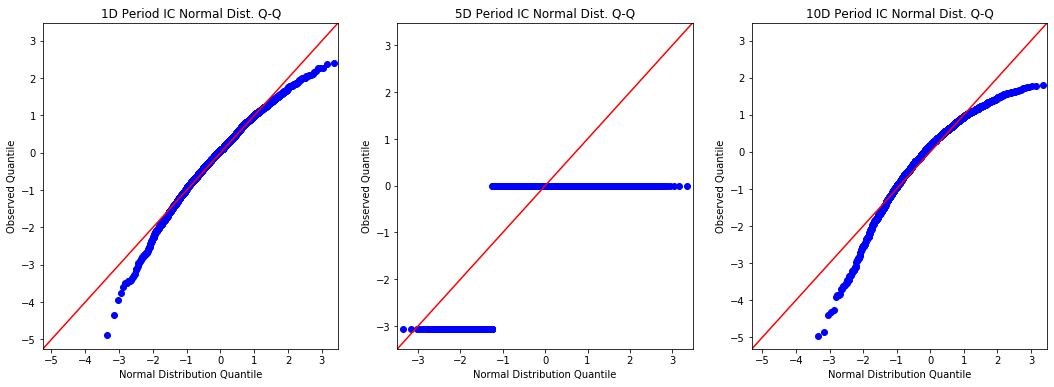

In [29]:
alphalens.plotting.plot_ic_qq(ic);

In [30]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')

In [31]:
mean_monthly_ic.head()

1D   5D       10D
date                               
2011-05-31  0.352110  1.0  0.615339
2011-06-30  0.327551  1.0  0.661076
2011-07-31  0.416884  1.0  0.683701
2011-08-31  0.345455  1.0  0.646237
2011-09-30  0.389419  1.0  0.670550

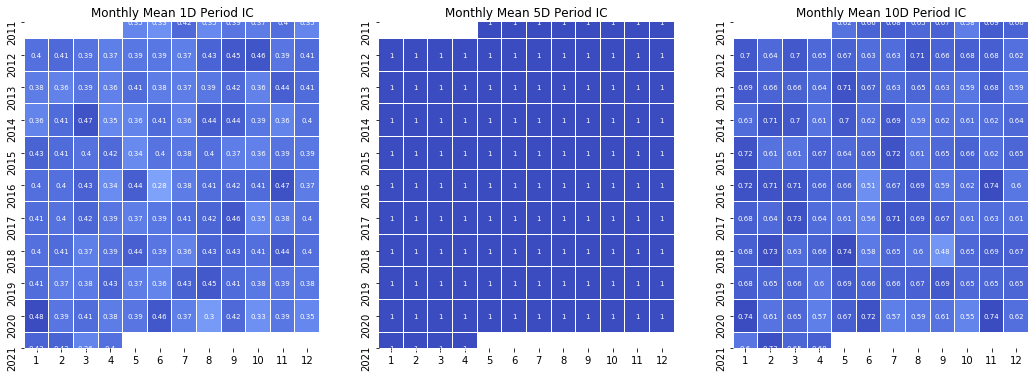

In [32]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

# Information Tear Sheet

Information Analysis


1D            5D      10D
IC Mean            0.395  1.000000e+00    0.652
IC Std.            0.229  0.000000e+00    0.172
Risk-Adjusted IC   1.727  2.764094e+16    3.784
t-stat(IC)        86.435  1.383704e+18  189.430
p-value(IC)        0.000  0.000000e+00    0.000
IC Skew           -0.584 -3.069000e+00   -1.074
IC Kurtosis        0.648  6.421000e+00    1.617

<Figure size 432x288 with 0 Axes>

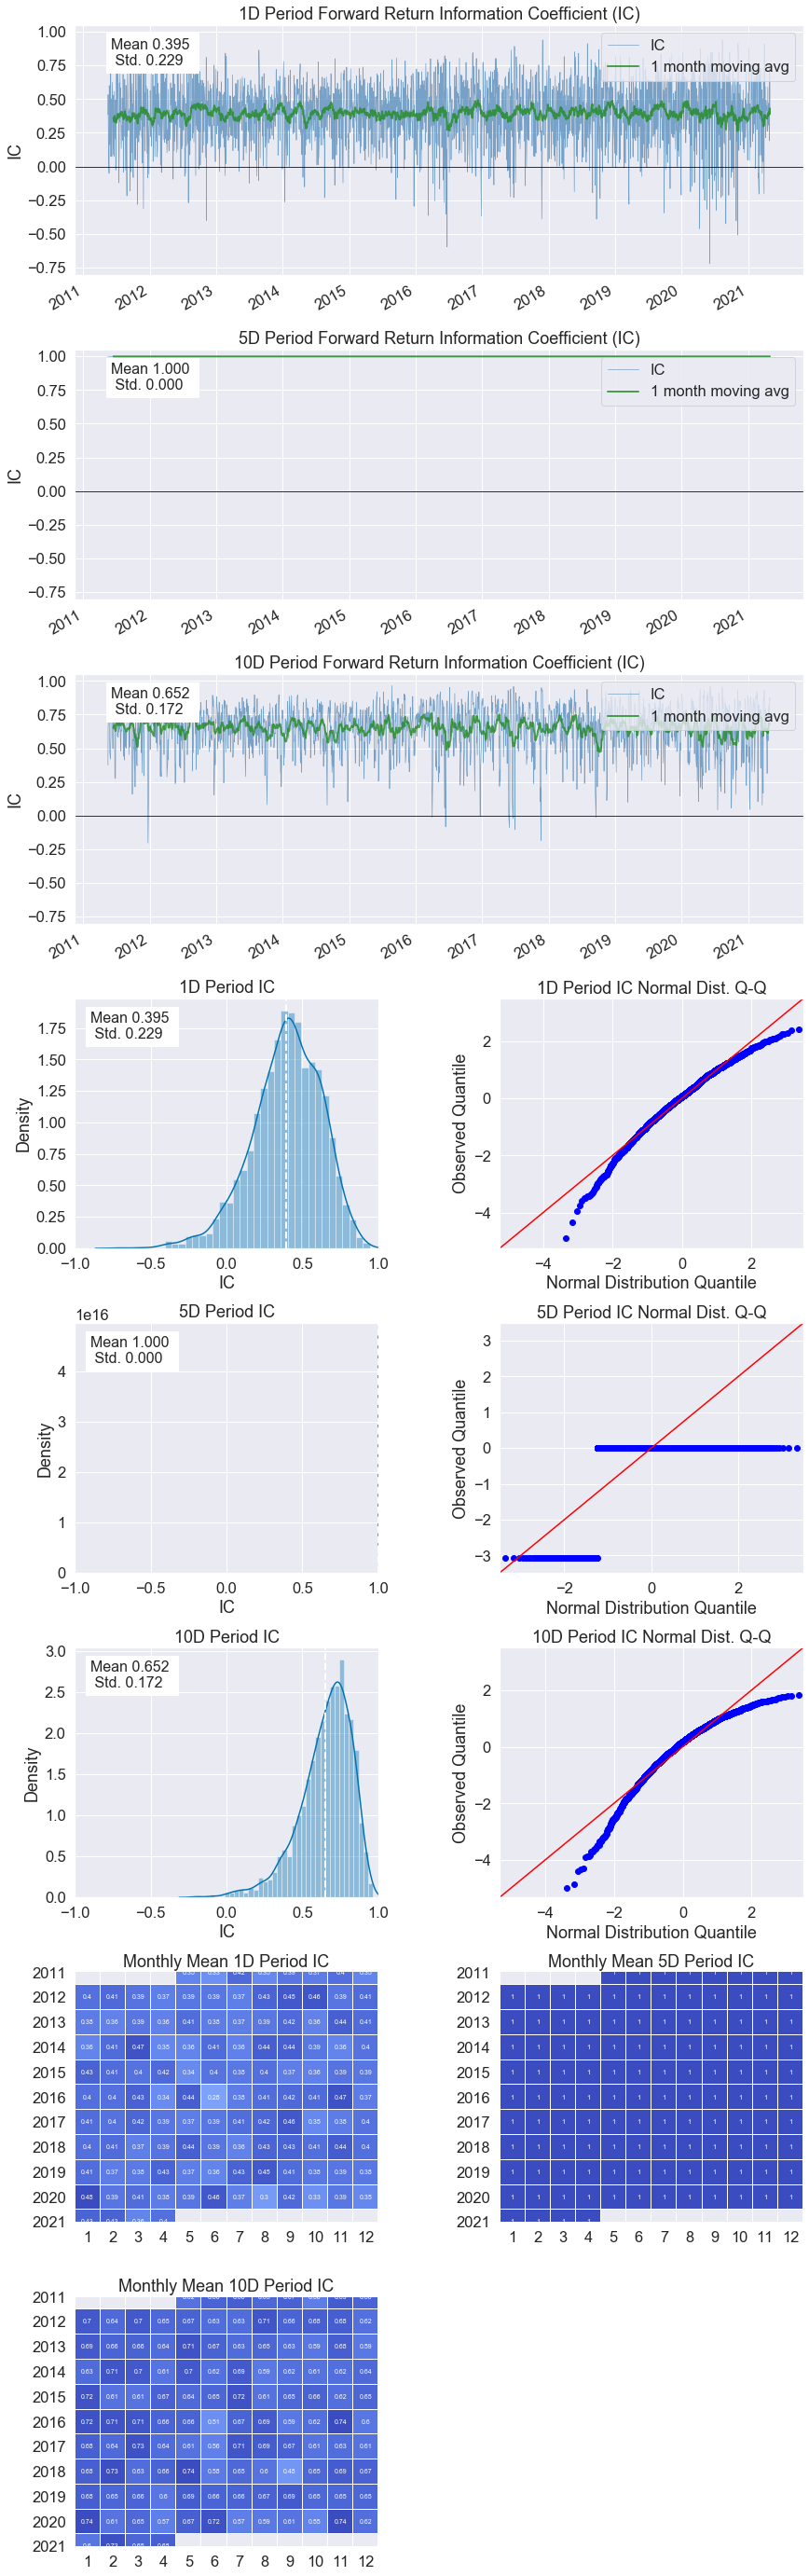

In [33]:
alphalens.tears.create_information_tear_sheet(factor_data)

# Turnover Analysis

In [34]:
quantile_factor = factor_data['factor_quantile']
turnover_period = 1

In [35]:
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantile_factor, q, turnover_period)
                               for q in range(1, int(quantile_factor.max()) + 1)], axis=1)

In [36]:
quantile_turnover.head()

1         2         3         4      5
date                                                
2011-05-17  NaN       NaN       NaN       NaN    NaN
2011-05-18  0.5  0.857143  0.857143  0.714286  0.500
2011-05-19  0.5  0.428571  0.571429  0.428571  0.375
2011-05-20  0.5  0.571429  0.714286  0.428571  0.250
2011-05-23  0.5  0.714286  0.714286  0.857143  0.375

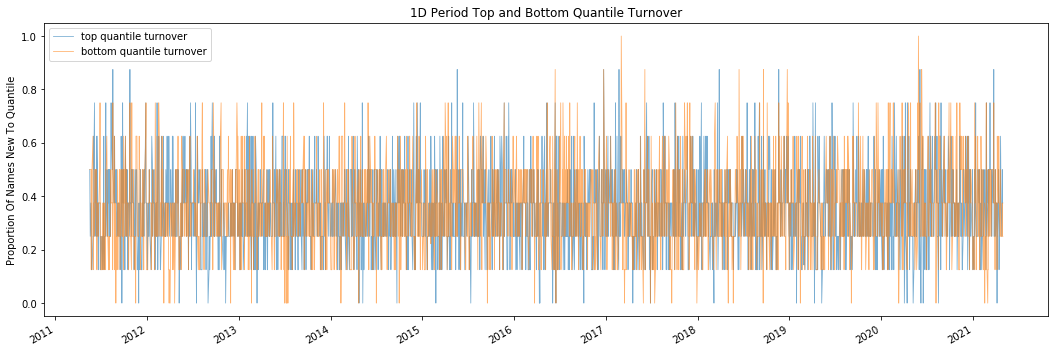

In [37]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, turnover_period)

In [38]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor_data, turnover_period)

In [39]:
factor_autocorrelation.head()

date
2011-05-17         NaN
2011-05-18    0.632764
2011-05-19    0.729967
2011-05-20    0.696302
2011-05-23    0.798009
Name: 1, dtype: float64

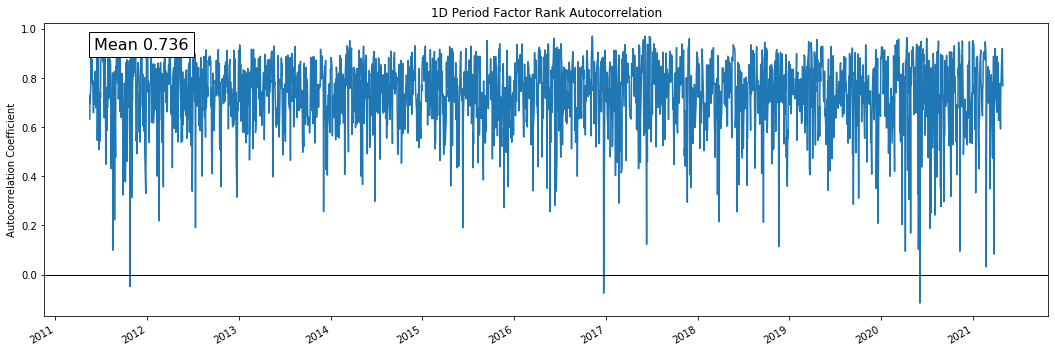

In [40]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

# Turnover Tear Sheet

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.359  0.774  0.773
Quantile 2 Mean Turnover   0.616  0.801  0.798
Quantile 3 Mean Turnover   0.652  0.789  0.788
Quantile 4 Mean Turnover   0.614  0.791  0.792
Quantile 5 Mean Turnover   0.349  0.770  0.772

1D     5D    10D
Mean Factor Rank Autocorrelation  0.736 -0.005 -0.005

<Figure size 432x288 with 0 Axes>

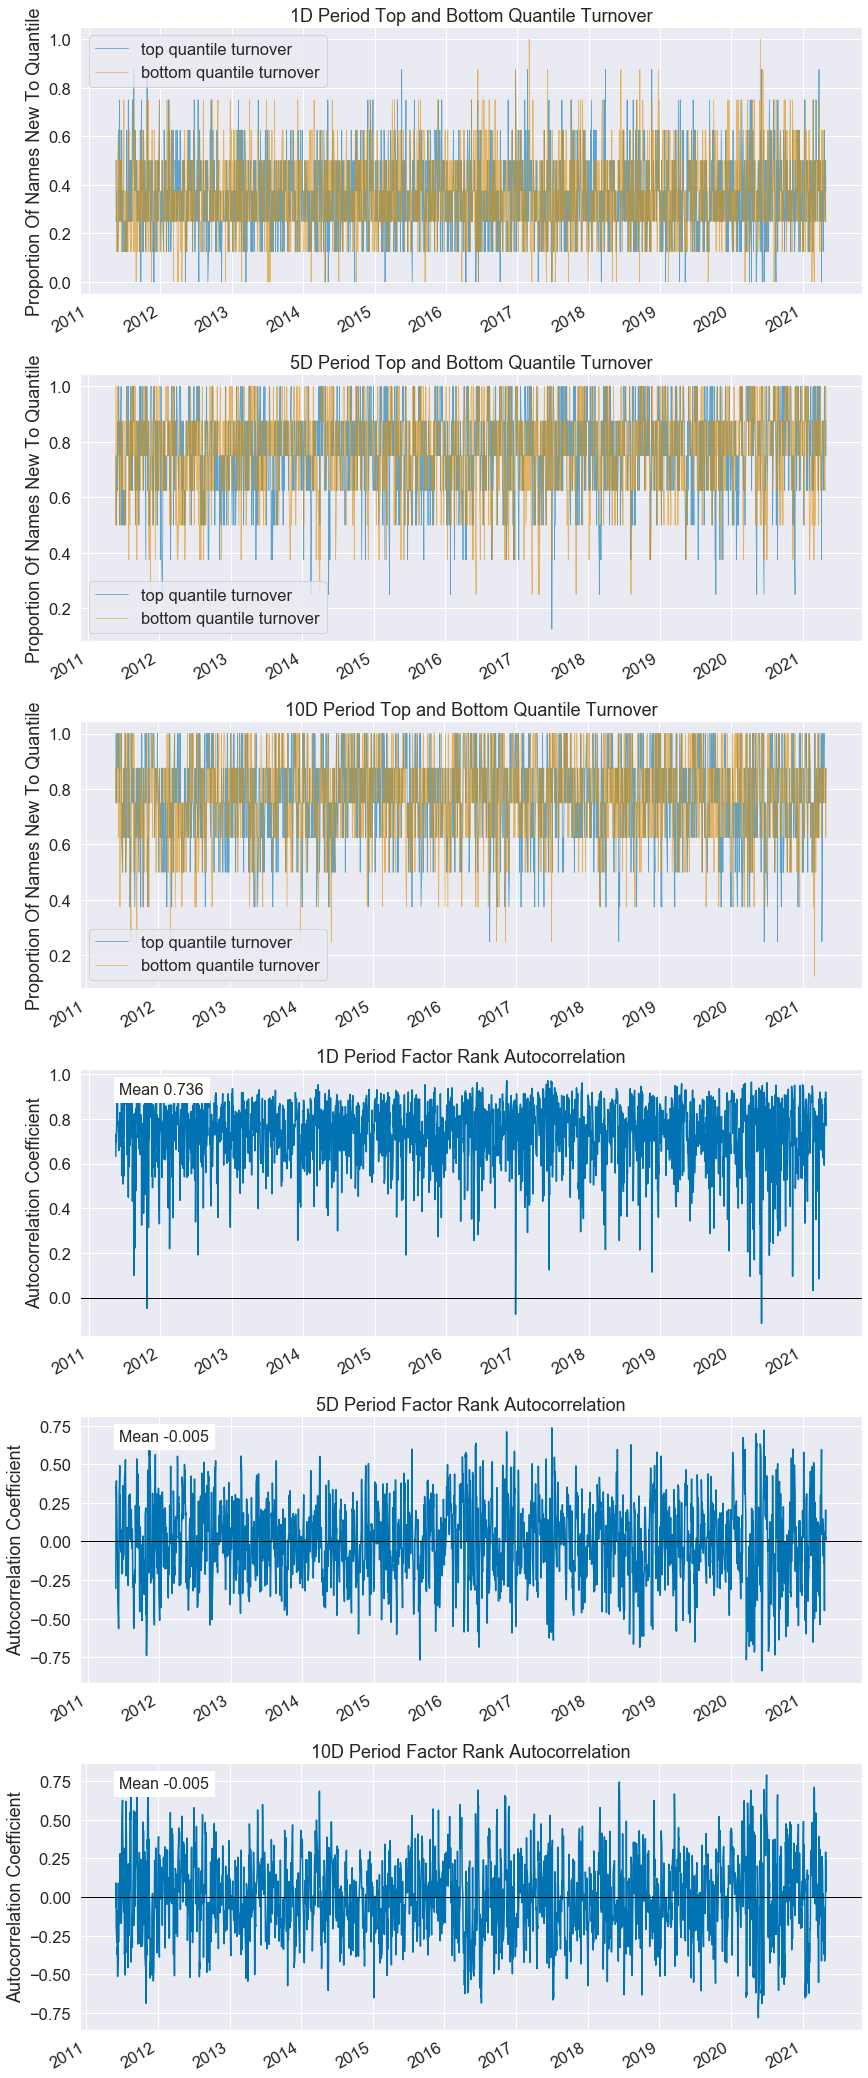

In [41]:
alphalens.tears.create_turnover_tear_sheet(factor_data)

# Event Style Returns Analysis

<Figure size 432x288 with 0 Axes>

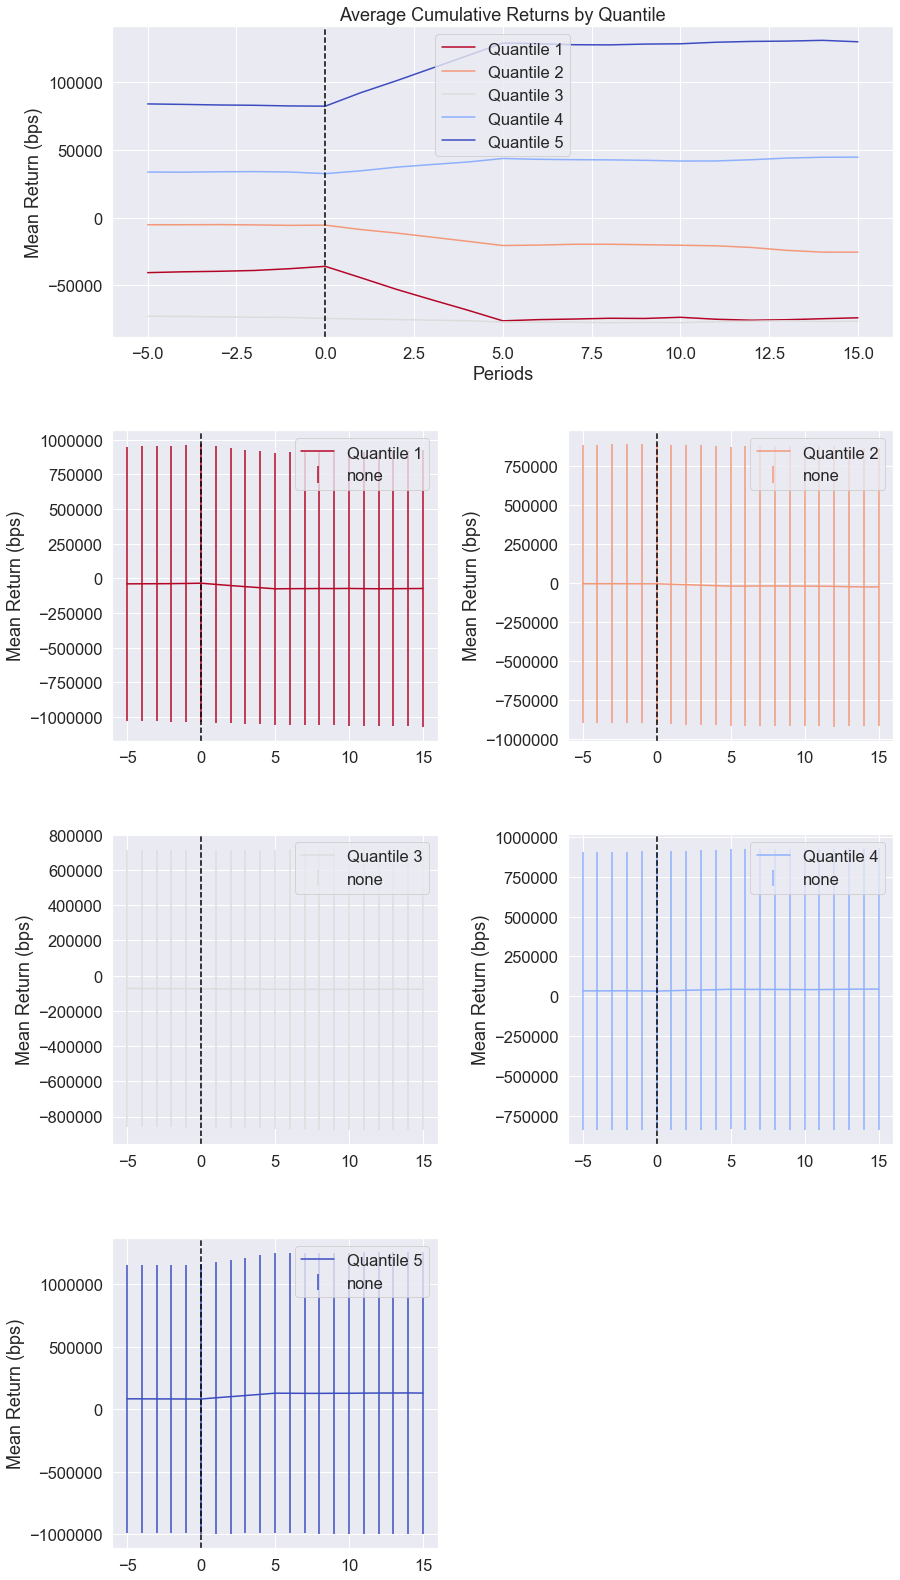

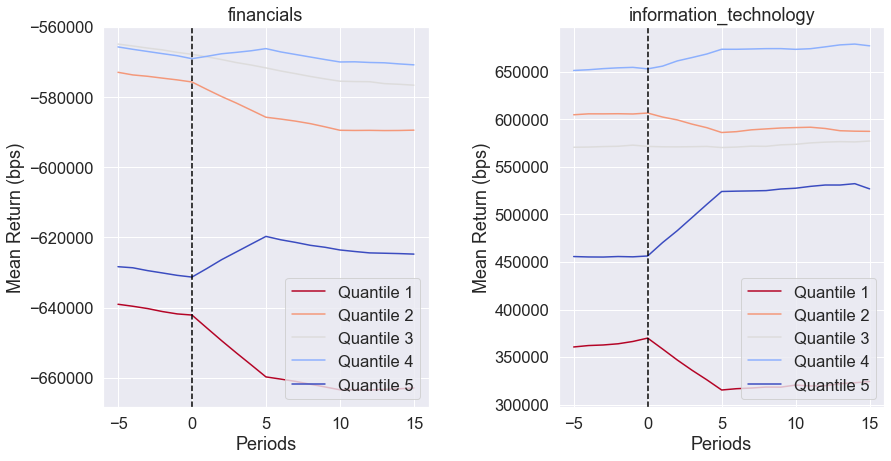

In [42]:
alphalens.tears.create_event_returns_tear_sheet(factor_data, pricing, by_group=True)

# Groupwise

In [43]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)

In [44]:
ic_by_sector.head()

1D   5D       10D
group                                          
financials              0.388165  1.0  0.641345
information_technology  0.383984  1.0  0.637250

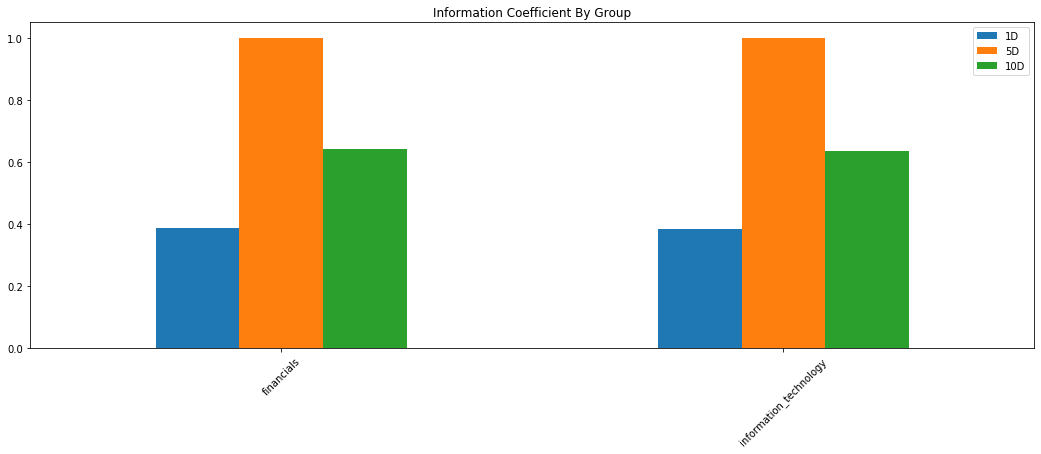

In [45]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [46]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(factor_data, by_group=True)

In [47]:
mean_return_quantile_sector.head()

1D        5D       10D
factor_quantile group                                               
1               financials             -0.007197 -0.035155 -0.035575
                information_technology -0.008917 -0.042377 -0.041909
2               financials             -0.002818 -0.013384 -0.015132
                information_technology -0.002888 -0.013588 -0.011575
3               financials             -0.000174 -0.000749 -0.002104

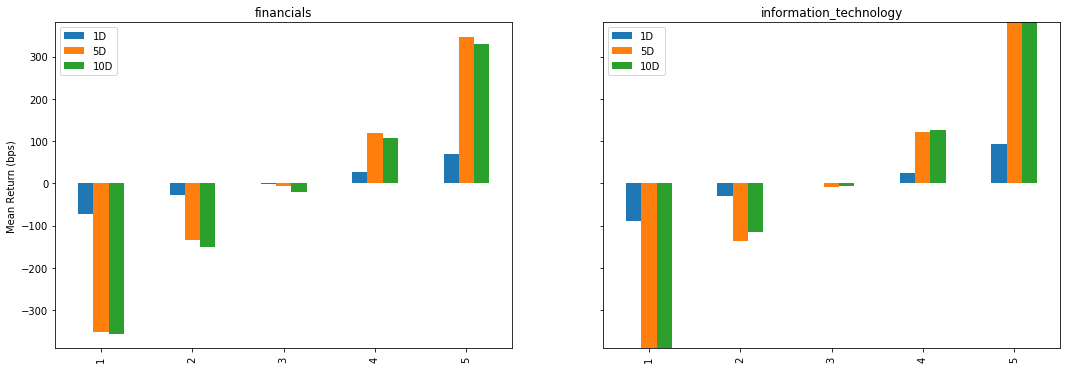

In [48]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.392377  0.085821 -0.036451  0.039439  20049  20.682078
2               -0.231755  0.112315 -0.010443  0.027859  19010  19.610270
3               -0.197411  0.143399  0.002520  0.026493  18825  19.419429
4               -0.165460  0.198953  0.015577  0.027956  19008  19.608207
5               -0.138780  0.786163  0.045148  0.045454  20047  20.680015

Returns Analysis


1D       5D     10D
Ann. alpha                                       8.619    7.959   1.972
beta                                             0.052    0.084   0.069
Mean Period Wise Return Top Quantile (bps)      84.834   82.396  41.114
Mean Period Wise Return Bottom Quantile (bps)  -82.197  -80.724 -39.697
Mean Period Wise Spread (bps)                  167.031  163.128  80.804

Information Analysis


1D            5D      10D
IC Mean            0.395  1.000000e+00    0.652
IC Std.            0.229  0.000000e+00    0.172
Risk-Adjusted IC   1.727  2.764094e+16    3.784
t-stat(IC)        86.435  1.383704e+18  189.430
p-value(IC)        0.000  0.000000e+00    0.000
IC Skew           -0.584 -3.069000e+00   -1.074
IC Kurtosis        0.648  6.421000e+00    1.617

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.359  0.774  0.773
Quantile 2 Mean Turnover   0.616  0.801  0.798
Quantile 3 Mean Turnover   0.652  0.789  0.788
Quantile 4 Mean Turnover   0.614  0.791  0.792
Quantile 5 Mean Turnover   0.349  0.770  0.772

1D     5D    10D
Mean Factor Rank Autocorrelation  0.736 -0.005 -0.005

<Figure size 432x288 with 0 Axes>

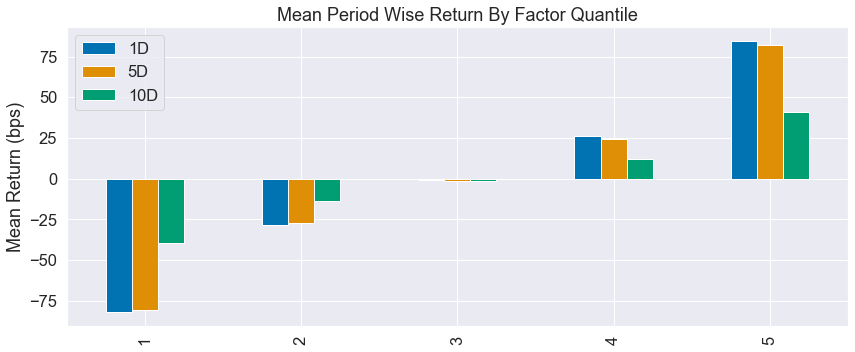

In [49]:
alphalens.tears.create_summary_tear_sheet(factor_data)

# The Whole Thing

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.392377  0.085821 -0.036451  0.039439  20049  20.682078
2               -0.231755  0.112315 -0.010443  0.027859  19010  19.610270
3               -0.197411  0.143399  0.002520  0.026493  18825  19.419429
4               -0.165460  0.198953  0.015577  0.027956  19008  19.608207
5               -0.138780  0.786163  0.045148  0.045454  20047  20.680015

Returns Analysis


1D       5D     10D
Ann. alpha                                       8.619    7.959   1.972
beta                                             0.052    0.084   0.069
Mean Period Wise Return Top Quantile (bps)      84.834   82.396  41.114
Mean Period Wise Return Bottom Quantile (bps)  -82.197  -80.724 -39.697
Mean Period Wise Spread (bps)                  167.031  163.128  80.804

<Figure size 432x288 with 0 Axes>

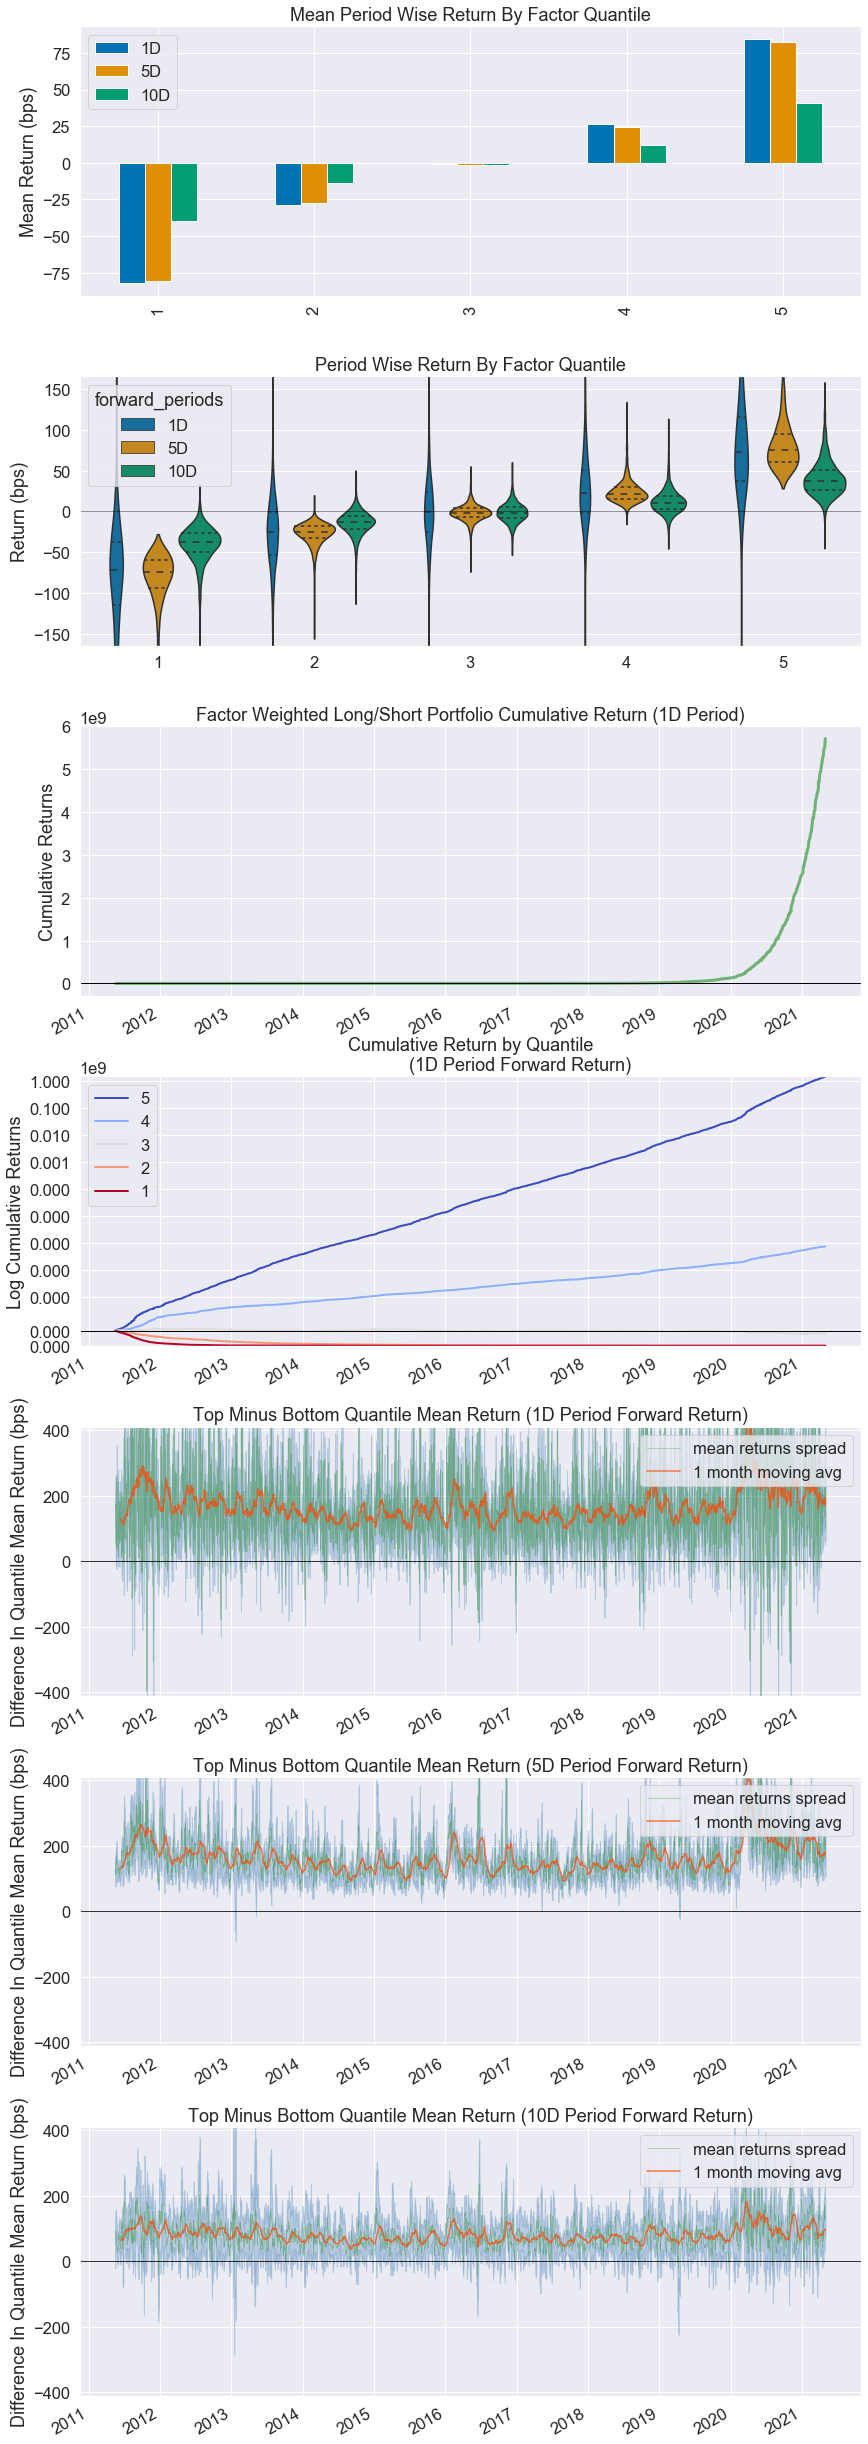

Information Analysis


1D            5D      10D
IC Mean            0.395  1.000000e+00    0.652
IC Std.            0.229  0.000000e+00    0.172
Risk-Adjusted IC   1.727  2.764094e+16    3.784
t-stat(IC)        86.435  1.383704e+18  189.430
p-value(IC)        0.000  0.000000e+00    0.000
IC Skew           -0.584 -3.069000e+00   -1.074
IC Kurtosis        0.648  6.421000e+00    1.617

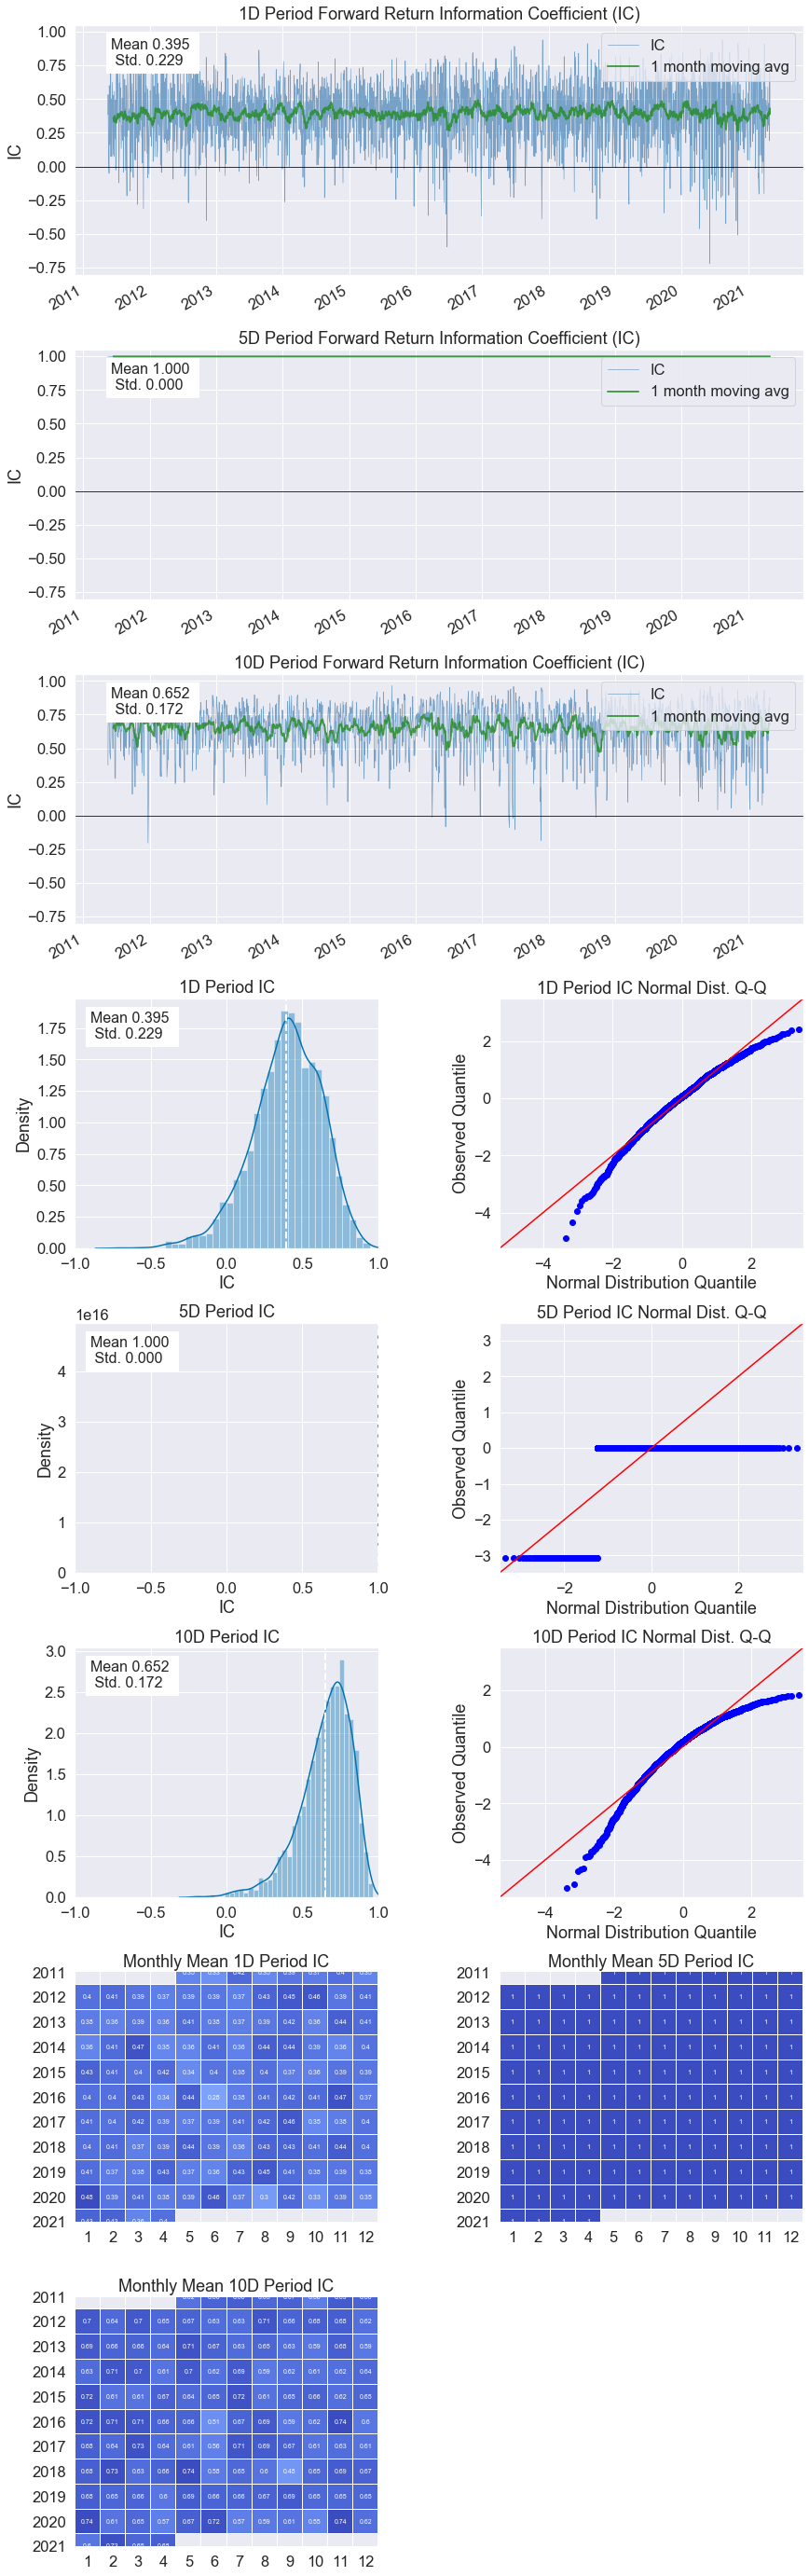

Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.359  0.774  0.773
Quantile 2 Mean Turnover   0.616  0.801  0.798
Quantile 3 Mean Turnover   0.652  0.789  0.788
Quantile 4 Mean Turnover   0.614  0.791  0.792
Quantile 5 Mean Turnover   0.349  0.770  0.772

1D     5D    10D
Mean Factor Rank Autocorrelation  0.736 -0.005 -0.005

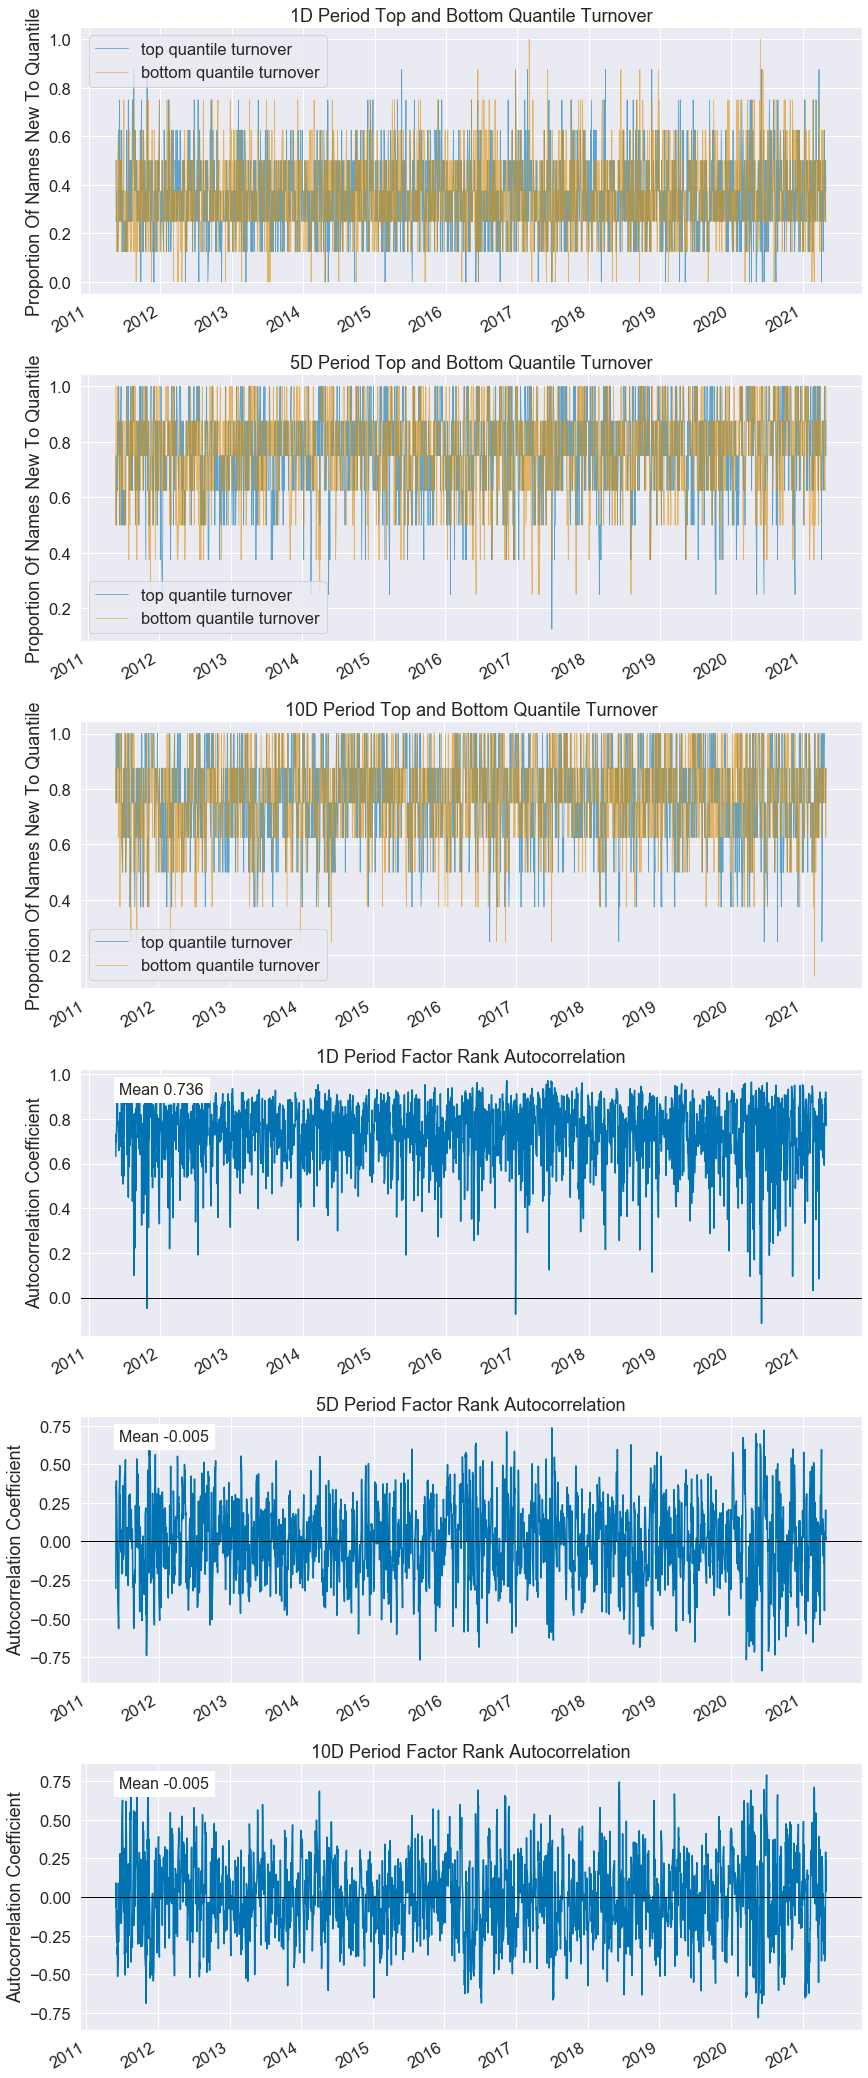

In [50]:
alphalens.tears.create_full_tear_sheet(factor_data)